# Scratch NB for prototyping

Attempting to extract probabilities from tf huggingface model

In [ ]:
from transformers import GPT2Tokenizer, TFGPT2LMHeadModel
import tensorflow as tf

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = TFGPT2LMHeadModel.from_pretrained('gpt2')

inputs = tokenizer("Hello, my dog is cute", return_tensors="tf")
outputs = model(inputs)
logits = outputs[0]
probs = tf.nn.softmax(logits); probs

All model checkpoint weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


<tf.Tensor: shape=(1, 6, 50257), dtype=float32, numpy=
array([[[5.58242900e-03, 5.08132810e-03, 1.32375411e-04, ...,
         5.53036102e-07, 8.81839753e-07, 1.64394279e-03],
        [1.74138957e-04, 2.43200702e-05, 3.34589981e-06, ...,
         2.89798720e-07, 3.58230608e-07, 4.39066382e-04],
        [1.71553285e-04, 5.55381994e-05, 1.98571342e-06, ...,
         4.45664591e-06, 1.00630615e-07, 5.77111359e-06],
        [3.80778462e-02, 1.58687786e-03, 1.70949825e-05, ...,
         1.67098495e-08, 2.56327553e-06, 1.18909200e-04],
        [1.45475147e-04, 1.00719599e-05, 9.82764732e-07, ...,
         6.14619966e-10, 5.48141621e-08, 1.10303176e-06],
        [8.44225213e-02, 4.18395316e-03, 2.10049279e-06, ...,
         5.69983949e-10, 7.84554732e-09, 1.12393645e-04]]], dtype=float32)>

In [ ]:
greedy_output = model.generate(inputs['input_ids'], max_length=inputs['input_ids'].shape[1] + 1)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(greedy_output[0], skip_special_tokens=True))

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence
Output:
----------------------------------------------------------------------------------------------------
Hello, my dog is cute.


Confirms softmax is producing a valid probability distribution since the max probability token is the same selected by the greedy decoding strategy used to generate the next token (i.e., pick token with largest probability)

In [ ]:
assert tf.math.argmax(probs[0][-1], output_type=tf.dtypes.int32) == greedy_output[0][-1]

Attempting to get mean probabilities from a model

In [ ]:
c

50068

In [ ]:
k = 20
top_k = np.argpartition(mean_probs, -k-c)[-k-c:-c]
top_probs = mean_probs[top_k]

In [ ]:
top_k

array([ 3237, 26257, 33554, 33555, 47133,  5376, 16922, 33586,  7416,
         366, 33553, 22417, 16668,  9487,  4550,  2457, 10100, 33587,
       33588, 19182])

In [ ]:
top_probs

array([0.00284996, 0.00573978,        nan,        nan, 0.00559844,
       0.00603686, 0.0275159 ,        nan, 0.01317916, 0.01241112,
              nan, 0.11572634, 0.00291297, 0.00574722, 0.00382953,
       0.00488013, 0.00463031,        nan,        nan, 0.00602458])

In [ ]:
top_probs

array([0.00603686, 0.00911282, 0.01241112, 0.01203716, 0.01317916,
              nan, 0.0275159 ,        nan,        nan,        nan])

In [ ]:
top_k

array([], dtype=int64)

&lt;BarContainer object of 10 artists&gt;

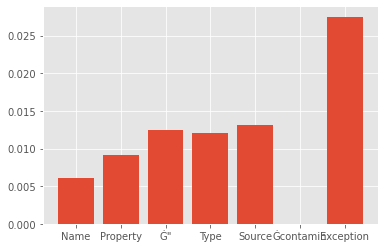

In [ ]:
plt.bar(tokenizer.convert_ids_to_tokens(top_k), top_probs)

In [ ]:
top_k

array([16837, 16834, 16833, 16835, 16838, 16829, 16832, 16831, 16830,
       50256])

In [ ]:
plt.bar(range(10), top_probs)

In [ ]:
len(non_nan_mean_prob.flatten())

189

&lt;BarContainer object of 10 artists&gt;

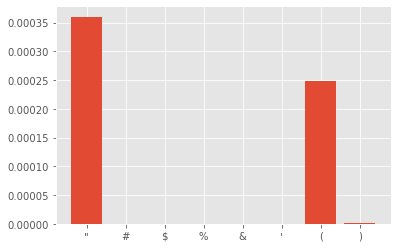

In [ ]:
plt.bar(tokenizer.convert_ids_to_tokens(range(10)), mean_probs[:10])

Mean probability of tokens...

Take id of special toks.... check if id of special tok is the next tok to be predicted? get prob of that and add to list



In [ ]:
x = np.array(tokenizer.encode(df_trn.code.values[0]))
y = np.array(tokenizer.convert_tokens_to_ids(['for', '}', ';']))

for t in y:
    print(t)
    print(np.where(x == t))

1640
(array([60]),)
92
(array([138, 142, 145]),)
26
(array([133]),)


In [ ]:
tokenizer.convert_tokens_to_ids(['for', ';'])

[1640, 26]

In [ ]:
print(df_trn.code.values[0])

protected final void bindIndexed(ConfigurationPropertyName name, Bindable&lt;?&gt; target,
			AggregateElementBinder elementBinder, ResolvableType aggregateType,
			ResolvableType elementType, IndexedCollectionSupplier result) {
		for (ConfigurationPropertySource source : getContext().getSources()) {
			bindIndexed(source, name, target, elementBinder, result, aggregateType,
					elementType);
			if (result.wasSupplied() &amp;&amp; result.get() != null) {
				return;
			}
		}
	}


In [ ]:
x

array([24326,  2457,  7951, 11007, 15732,   276,     7, 38149, 21746,
        5376,  1438,    11, 41211,   540, 47934,    29,  2496,    11,
         198,   197,   197,   197, 46384, 49373, 20180,    33,  5540,
        5002,    33,  5540,    11,  1874,   349, 23765,  6030, 19406,
        6030,    11,   198,   197,   197,   197,  4965,   349, 23765,
        6030,  5002,  6030,    11, 12901,   276, 36307, 15979,  2505,
        1255,     8,  1391,   198,   197,   197,  1640,   357, 38149,
       21746,  7416,  2723,  1058,   651, 21947, 22446,  1136, 21188,
       28955,  1391,   198,   197,   197,   197, 21653, 15732,   276,
           7, 10459,    11,  1438,    11,  2496,    11,  5002,    33,
        5540,    11,  1255,    11, 19406,  6030,    11,   198,   197,
         197,   197,   197,   197, 30854,  6030,  1776,   198,   197,
         197,   197,   361,   357, 20274,    13,  9776, 15979, 18511,
        3419, 11405,  1255,    13,  1136,  3419, 14512,  9242,     8,
        1391,   198,

In [ ]:
x = np.array(tokenizer.encode(df_trn.code.values[0]))
y = np.array(tokenizer.convert_tokens_to_ids(['}', '@', '+', '++']))

index = np.argsort(x)
sorted_x = x[index]
sorted_index = np.searchsorted(sorted_x, y)

yindex = np.take(index, sorted_index, mode="clip")
mask = x[yindex] != y

result = np.ma.array(yindex, mask=mask); result

masked_array(data=[145, --, --, --],
             mask=[False,  True,  True,  True],
       fill_value=999999)

list

In [ ]:
tokenizer.convert_ids_to_tokens(26)

&#39;;&#39;

In [ ]:
x = np.array([3,5,7,1,9,8,6,6])
y = np.array([2,1,5,10,100,6])

index = np.argsort(x)
sorted_x = x[index]
sorted_index = np.searchsorted(sorted_x, y)

yindex = np.take(index, sorted_index, mode="clip")
mask = x[yindex] != y

result = np.ma.array(yindex, mask=mask); result

masked_array(data=[--, 3, 1, --, --, 6],
             mask=[ True, False, False,  True,  True, False],
       fill_value=999999)

In [ ]:

def get_mean_probs(df, model):
    mean_probs = []
    for mthd in df.code.values[:10]:
        inputs = model.tokenize(mthd)
        if 
        probs = model.get_probs(inputs)[0]
        mean_prob = tf.math.reduce_mean(probs, axis = 0)
        mean_probs.append(mean_prob)
    
    mean_probs = tf.convert_to_tensor(mean_probs)
    mean_probs = tf.reduce_mean(mean_probs, axis = 0)
    return mean_probs

In [ ]:
mean_probs = get_mean_probs(df_trn, model).numpy(); mean_probs

array([2.1428997e-02, 1.8236816e-03, 2.6314210e-05, ..., 8.8622903e-07,
       6.6110613e-07, 3.8686435e-04], dtype=float32)

&lt;BarContainer object of 10 artists&gt;

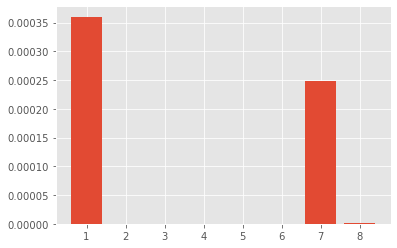

In [ ]:
plt.bar(range(10), mean_probs[:10])

In [ ]:
k = 10
top_k = np.argpartition(mean_probs, -k)[-k:]; top_k
top_probs = mean_probs[top_k]

In [ ]:
top_probs = mean_probs[top_k]; top_probs

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [ ]:
top_k

array([16837, 16834, 16833, 16835, 16838, 16829, 16832, 16831, 16830,
       50256])

&lt;BarContainer object of 10 artists&gt;

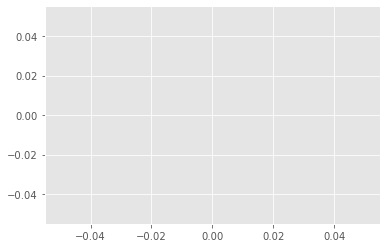

In [ ]:
plt.bar(range(10), top_probs)

In [ ]:
def get_mean_cross_entropy(df, model, n = None):
    if n is None: n = len(df)

    cross_entropy_losses = []
    bce = tf.keras.losses.BinaryCrossentropy(
        reduction = tf.keras.losses.Reduction.NONE
    )
    for mthd in df.code.values[:n]:
        # token the method and generate the probabilities for the model's predictions
        inputs = model.tokenize(mthd)
        labels = np.zeros((len(inputs['input_ids']), len(model.tokenizer)))
        labels[np.arange(len(inputs['input_ids'])), inputs['input_ids'].numpy()] = 1

        probs = model.get_probs(inputs)[0].numpy()
        cross_entropy = bce(labels, probs).numpy()

        cross_entropy_losses.append(cross_entropy)
    
    cross_entropy_losses = np.concatenate(cross_entropy_losses)
    return np.mean(cross_entropy_losses)

In [ ]:
mean_cross_entropy = get_mean_cross_entropy(df_trn, model, n = 100)#; np.mean(cross_entropy_losses)

In [ ]:
mean_cross_entropy

0.014070554

In [ ]:
mean_cross_entropy

0.01413073

In [ ]:
len(cross_entropy_losses)

1145

In [ ]:
np.mean(cross_entropy_losses)

0.01413073

In [ ]:
cross_entropy_losses

In [ ]:
inputs = model.tokenize(df_fake.code.values[0]); inputs['input_ids']

&lt;tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[9288]], dtype=int32)&gt;

In [ ]:
b = np.zeros((len(inputs['input_ids']), len(model.tokenizer))); b.shape

(1, 50257)

In [ ]:
b[np.arange(len(inputs['input_ids'])), inputs['input_ids'].numpy()] = 1

In [ ]:
b.shape, np.nonzero(b)[1]

((1, 50257), array([9288]))

In [ ]:
assert (b == b).all()

In [ ]:
bce = tf.keras.losses.BinaryCrossentropy(
    reduction = tf.keras.losses.Reduction.NONE
)

In [ ]:
probs = model.get_probs(inputs)[0].numpy(); probs

array([[2.2635560e-03, 4.1926978e-03, 1.9162198e-04, ..., 8.6615199e-07,
        1.4321838e-06, 1.1893366e-03]], dtype=float32)

In [ ]:
bce(b, probs).numpy()

array([0.00019822], dtype=float32)

In [ ]:
bce(b, b).numpy()

array([0.])